## Напишіть функцію гіпотези лінійної регресії у векторному вигляді

$$h(x) = \omega_{0} + \omega_{1}x$$
$$h(x_{1},x_{2}) = \omega_{0} + \omega_{1}x_{1} + \omega_{2}x_{2}$$
$$h(x_{1},....,x_{n}) = \omega_{0} + \omega_{1}x_{1} + ... +\omega_{n}x_{n}$$
$$h(x_{i}) = \omega_{0} + \sum \limits _{i=1} ^{n} \omega_{n} x_{n}$$
$$ \vec{x} = \begin{pmatrix} 1 \\ x_{1} \\ \vdots \\ x_{n}\end{pmatrix} ,   \vec{\omega} = \begin{pmatrix} \omega_{0} \\ \omega_{1} \\ \vdots \\ \omega_{n}\end{pmatrix}$$
$$h(\vec{x}) = \vec{x} \cdot \vec{\omega}$$

In [1]:
import numpy as np

In [2]:
def linear_regression(x: np.array, w: np.array):
    assert x.shape[1] == w.shape[0], "Wrong shapes"
    return np.dot(x, w)

## Test

In [3]:
x = np.array([[1, 2, 3]])
w= np.array([1, 2, 3])

print(x.shape[1], w.shape[0])
assert linear_regression(x, w) == 14

3 3


## Cтворіть функцію для обчислення функції втрат у векторному вигляді

$$ J(\omega_{0}, \omega_{}, ..., \omega_{n}) = \cfrac 1 {2m} \sum \limits _{i=1} ^{m} (h(x^{(i)}) - y^{(i)})^2 $$

In [198]:
def loss(x: np.array, w: np.array, y: np.array):
    return np.sum(np.square(linear_regression(x, w) - y)) / (2 * x.shape[0])

## Test

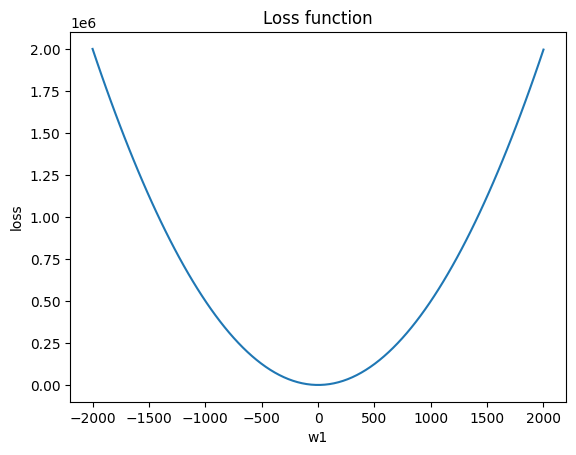

In [212]:
import matplotlib.pyplot as plt

test_x = np.array([[1, 1]])
test_y = np.array([1])

x_axis= np.linspace(-2000, 2000, 100)
y_axis= [ loss(test_x, np.array([0, weight]), test_y) for weight in x_axis]

plt.plot(x_axis, y_axis)
plt.title("Loss function")
plt.xlabel("w1")
plt.ylabel("loss")
plt.show()

[[-2000. -1000.     0.  1000.  2000.]
 [-2000. -1000.     0.  1000.  2000.]
 [-2000. -1000.     0.  1000.  2000.]
 [-2000. -1000.     0.  1000.  2000.]
 [-2000. -1000.     0.  1000.  2000.]]
[[-2000. -2000. -2000. -2000. -2000.]
 [-1000. -1000. -1000. -1000. -1000.]
 [    0.     0.     0.     0.     0.]
 [ 1000.  1000.  1000.  1000.  1000.]
 [ 2000.  2000.  2000.  2000.  2000.]]
[[16000000.  9000000.  4000000.  1000000.        0.]
 [ 9000000.  4000000.  1000000.        0.  1000000.]
 [ 4000000.  1000000.        0.  1000000.  4000000.]
 [ 1000000.        0.  1000000.  4000000.  9000000.]
 [       0.  1000000.  4000000.  9000000. 16000000.]]


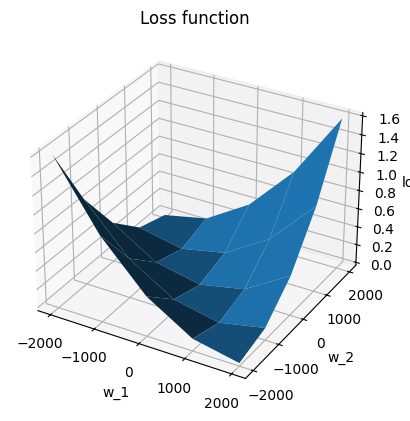

In [209]:
ax = plt.figure().add_subplot(projection='3d')

test_x = np.array([[1, 1, 1]])
test_y = np.array([1, 1])

x_axis= np.linspace(-2000, 2000, 5)
y_axis = np.linspace(-2000, 2000, 5)

z_axis = []

weight_1, weight_2 = np.meshgrid(x_axis, y_axis)

for i in range(len(weight_1)):
    z_axis.append([loss(test_x, np.array([1, weight_1[i][j], weight_2[j][i]]), test_y) for j in range(len(weight_1[i]))])

z_axis = np.array(z_axis)
print(weight_1)
print(weight_2)
print(z_axis)

ax.plot_surface(weight_1, weight_2, z_axis, linewidth=0)
ax.set_xlabel("w_1")
ax.set_ylabel('w_2')
ax.set_zlabel('loss')


plt.title("Loss function")
plt.show()

## Реалізуйте один крок градієнтного спуску


$$\nabla J (\vec \omega) = \cfrac 1 {m} X^{T} \Bigl (X \vec \omega -\vec y \Bigl)$$

In [8]:
def gradient_step(x: np.array, w: np.array, y: np.array):
    m = x.shape[0]
    delta = x.dot(w) - y
    return np.dot(x.T, delta) / m


def do_gradient_step(
    x: np.array, w: np.array, y: np.array, learning_rate: float = 0.01
):
    step = gradient_step(x, w, y)
    return w - step * learning_rate


def gradient_step_do(
    x: np.array, w: np.array, y: np.array, learning_rate: float = 0.01
):
    m = x.shape[0]
    delta = x.dot(w) - y
    step = np.dot(x.T, delta) / m
    return w - step * learning_rate

## Знайдіть найкращі параметри 𝑤⃗ для [датасету](https://drive.google.com/file/d/1-rAa4XT4_fI0dOBlMNuE6a7jB0wln_Qo/view?usp=share_link) прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень

In [9]:
import pandas as pd

In [10]:
URL = "https://drive.usercontent.google.com/download?id=1-rAa4XT4_fI0dOBlMNuE6a7jB0wln_Qo&export=download"

dataframe = pd.read_csv(URL, header=0)
if len(dataframe) == 0:
    print("Error: file not found")
    raise ValueError

dataframe


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## Знайдіть ці ж параметри за допомогою аналітичного рішення

## Порівняйте отримані результати